# Exploratory Analysis

**Desc:** This script undertakes some basic exploration of the provided dataset. 

In [53]:
# Load Required Packages
library(plotly)
library(data.table)
library(ggplot2)
library(reshape2)
library(rattle)
library(GGally)
library(corrplot)
library(foreach)

# Session Options
options(repr.plot.width=10, repr.plot.height=7)

In [30]:
# Source Data
dt <- fread('/Users/yassineltahir/Downloads/analysisProblemForInterview.csv', 
            colClasses=list(character=1:7))

# Data Dictionary
dd <- data.table(field=c('Customer_ID','result_rank','provider_Nm','product_name',
                         'dummy_quote_value','Sale_made','Sale_source'),
                meaning=c('unique customer identifier',
                          'the position of the product quoted in the customers results (where 1 is the top result)',
                         'name of the provider',
                         'name of the product',
                         'annual cost of product (AUD)',
                         'indicator of sale',
                         'an indicator of wether the customer purchased online or via a consultant in the call centre'))

# Clean & format data
dt$Customer_ID <- as.factor(dt$Customer_ID)
dt$result_rank <- as.numeric(dt$result_rank)
dt$provider_Nm <- as.factor(dt$provider_Nm)
dt$product_name <- as.factor(dt$product_name)
dt$dummy_quote_value <- as.numeric(ifelse(dt$dummy_quote_value == 'MISSING', NA, dt$dummy_quote_value))
dt$Sale_made <- as.factor(dt$Sale_made)
dt$Sale_source <- as.factor(dt$Sale_source)

# Update Sale_source == "" so it's a more useful entry
dt[Sale_source==""]$Sale_source <- "No Sale"

dd
head(dt)
summary(dt)

field
1       Customer_ID
2       result_rank
3       provider_Nm
4      product_name
5 dummy_quote_value
6         Sale_made
7       Sale_source
                                                                                      meaning
1                                                                  unique customer identifier
2     the position of the product quoted in the customers results (where 1 is the top result)
3                                                                        name of the provider
4                                                                         name of the product
5                                                                annual cost of product (AUD)
6                                                                           indicator of sale
7 an indicator of wether the customer purchased online or via a consultant in the call centre

Customer_ID result_rank provider_Nm product_name dummy_quote_value Sale_made
1          37           1  Provider A   Product 64            377.09         0
2          37           2  Provider A Product 3160             60.40         0
3          37           3  Provider A   Product 56            309.12         0
4          37           4  Provider A  Product 552            224.30         0
5          37           5  Provider A Product 3292             79.15         0
6          37           6  Provider A   Product 76            401.60         0
  Sale_source
1     No Sale
2     No Sale
3     No Sale
4     No Sale
5     No Sale
6     No Sale

  Customer_ID    result_rank        provider_Nm         product_name 
 1661666:  16   Min.   : 1.00   Provider A:3447   Product 84  : 639  
 1685822:  14   1st Qu.: 2.00   Provider B:1240   Product 552 : 599  
 1629520:  12   Median : 4.00                     Product 1412: 596  
 1637948:  12   Mean   : 4.56                     Product 56  : 573  
 1641827:  12   3rd Qu.: 6.00                     Product 3164: 486  
 1659907:  12   Max.   :12.00                     Product 3160: 428  
 (Other):4609                                     (Other)     :1366  
 dummy_quote_value Sale_made     Sale_source  
 Min.   :   0.03   0:4453              :   0  
 1st Qu.: 176.66   1: 234    callcentre: 113  
 Median : 352.35             online    : 121  
 Mean   : 464.54             No Sale   :4453  
 3rd Qu.: 587.51                              
 Max.   :7204.05                              
 NA's   :18                                   

Warning message:
In fn(x$data, plotObj$mapping): Removed 18 rows containing missing valuesWarning message:
: Removed 18 rows containing missing values (geom_point).Warning message:
: Removed 18 rows containing non-finite values (stat_density).Warning message:
: Removed 18 rows containing non-finite values (stat_boxplot).`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
: Removed 18 rows containing non-finite values (stat_bin).

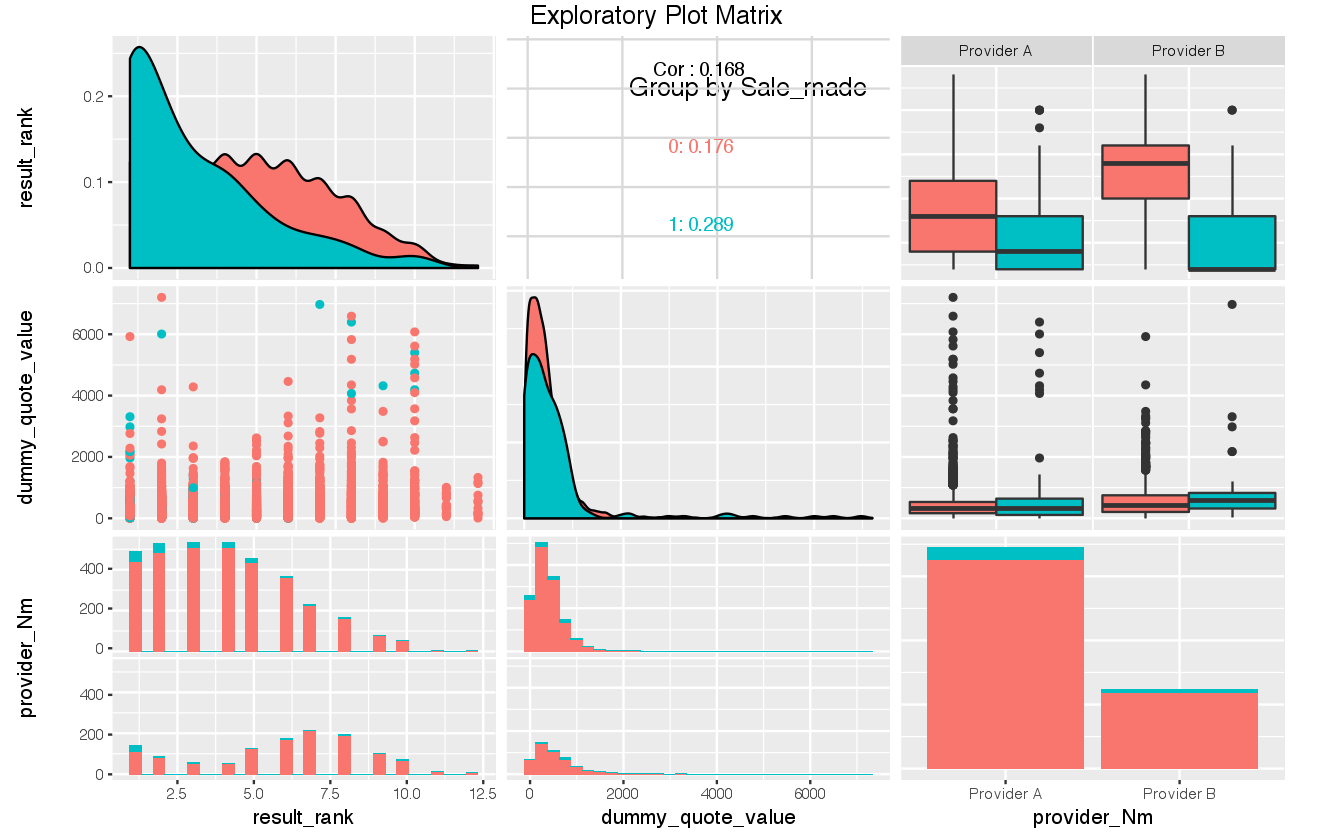

In [21]:
# Against Sale 
ggpairs(data = dt, 
        columns = c('result_rank','dummy_quote_value','provider_Nm'),
        mapping = aes(colour=Sale_made),
        title = 'Plot Matrix - Group by Sale_made')

# Sale_made Notes

## Result Rank vs ...
sale=0: Fairly evenly distributed up to position ~8. Potentially implies an inappropriate product won't sell regardless of rank.  
sale=1: Strong left skew, indicating that when a sale takes place, it's generally one of the earlier listed products.

Provider: Again seeing that lower ranks correlate with sales. Sale ranges are almost identical for prodiver **A** and **B**, except with **B** having a much lower mean/median. Provider **A** tends to be shown earlier although this may be due to randomness (**A** has 16 products versus **B**'s 3).  


## Futher investigation required
- dummy_quote_value vs result_rank
- dummy_quote_value vs (provider_Nm & Sale_made)

Warning message:
In fn(x$data, plotObj$mapping): Removed 18 rows containing missing valuesWarning message:
: Removed 18 rows containing missing values (geom_point).Warning message:
: Removed 18 rows containing non-finite values (stat_density).Warning message:
: Removed 18 rows containing non-finite values (stat_boxplot).`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
: Removed 18 rows containing non-finite values (stat_bin).

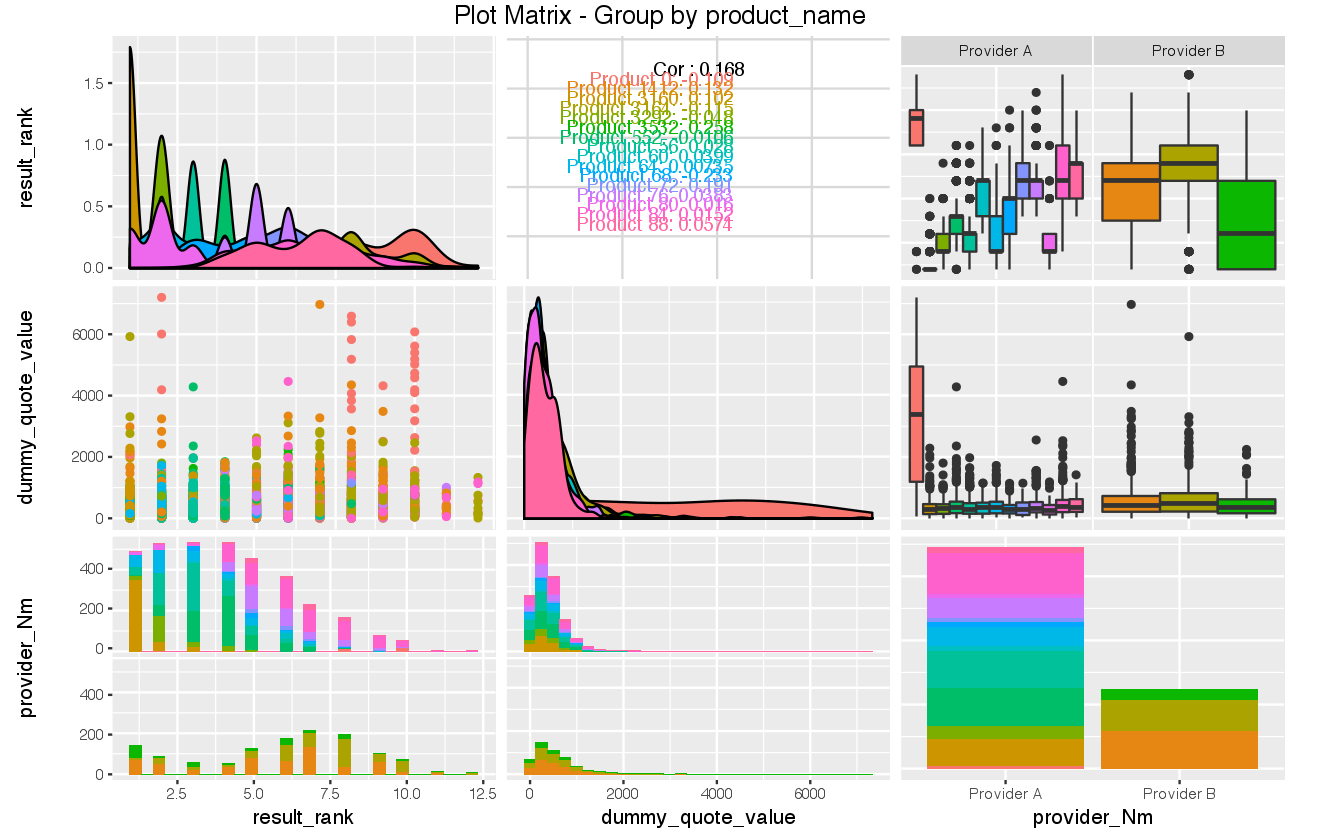

In [22]:
# Against Product Name 
ggpairs(data = dt, 
        columns = c('result_rank','dummy_quote_value','provider_Nm'),
        mapping = aes(colour=product_name),
        title = 'Plot Matrix - Group by product_name')

# product_name Notes  

- Provider B: 2 products repeatedly returned early in display. 3rd product is lowly returned.
- As expected quote value changes a lot between customers.
- Product 0 displays largest variance in dummy_quote_value. Why? Possibly an opportunity to exploit this if sales are strong. Needs further investigation.
- dummy_quote_value is reasonably consistent across result_rank, excluding product_0

Warning message:
In fn(x$data, plotObj$mapping): Removed 2 rows containing missing valuesWarning message:
: Removed 2 rows containing missing values (geom_point).Warning message:
: Removed 2 rows containing non-finite values (stat_density).Warning message:
: Removed 2 rows containing non-finite values (stat_boxplot).`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
: Removed 2 rows containing non-finite values (stat_bin).

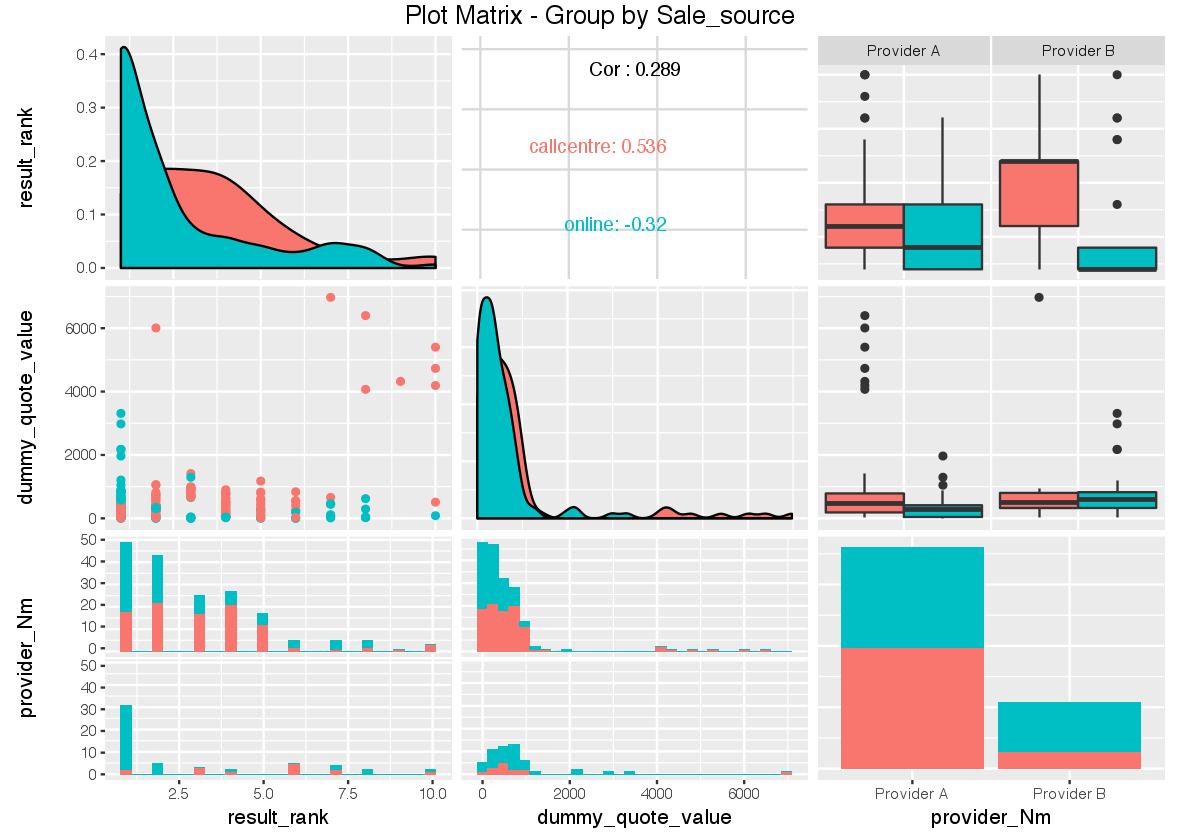

In [31]:
# Against Sale Source
ggpairs(data = dt[Sale_source !="No Sale"], 
        columns = c('result_rank','dummy_quote_value','provider_Nm'),
        mapping = aes(colour=Sale_source),
        title = 'Plot Matrix - Group by Sale_source')

# Sale_source Notes

(only exploring cases of a sale having been made)

- Most online sales were made on products with higher rank.
- For online sales a secondary spike exists for products with rank 7-8. Possibly the first result shown on page 2? If so this means customers favour the first result they see (assuming they read results left to right). Possibly worth returning a non-sequential order (ie pg1 = 1 2 5 6 7, pg2 = 3 4 8 9 10).
- Callcentre sales tend to be less dependent on result_rank. Indicates different behaviours drive online vs callcentre sales.
- Highest sale prices (quote_value on actual sale) occurs for callcentre sales.
- What is operation cost of callcentre vs online? Possibly worth pushing customers towards callcentre although this requires more investigation.
- Online sales with rank >1 tend to have low quote value. Also relates to 2nd mode in rank distribution. Possibly customers looking for the cheapest/cheaper price?  

# Investigate Correlations

Sale_source  cor_val             
[1,] "No Sale"    "0.0727721540666169"
[2,] "online"     "-0.30761222050974" 
[3,] "callcentre" "0.0640352703997492"

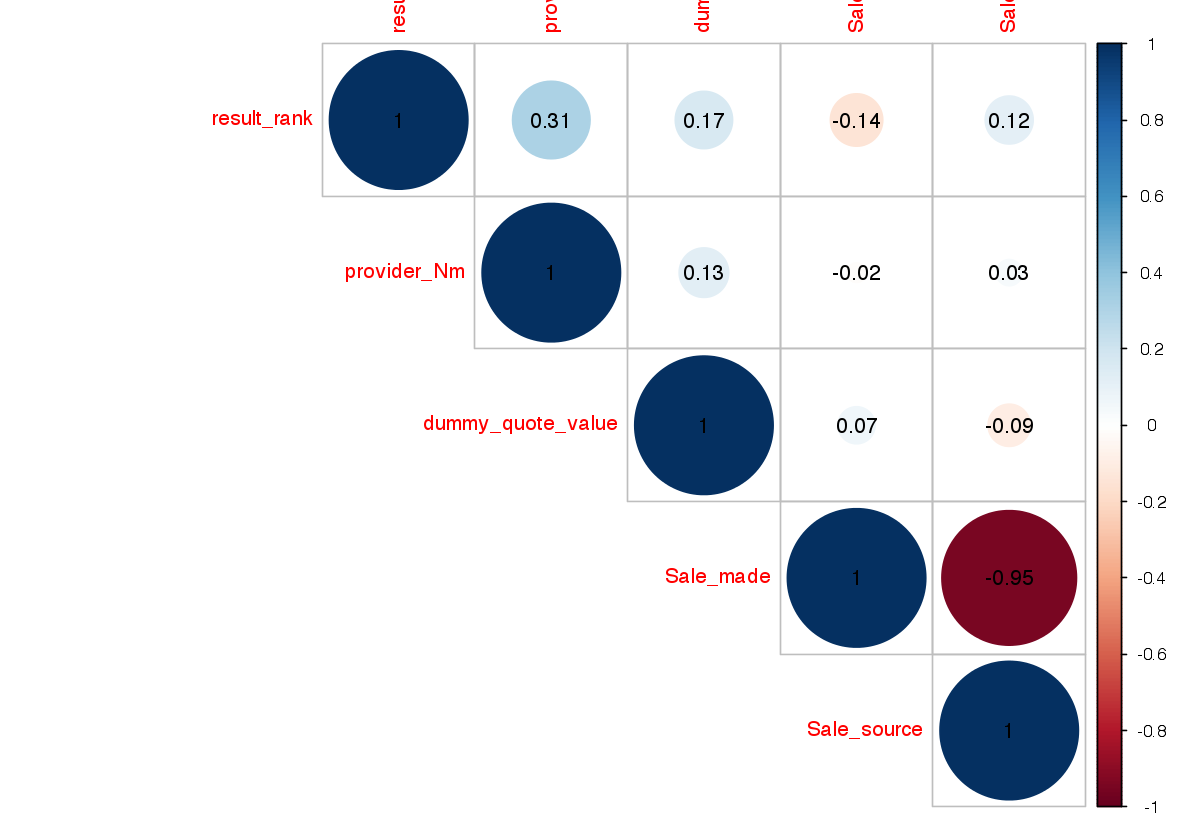

In [88]:
# Convert some categorical variables to numeric
dt_cor <- dt[complete.cases(dt)]
dt_cor$provider_Nm <- as.numeric(dt_cor$provider_Nm)
dt_cor$Sale_made <- as.numeric(dt_cor$Sale_made)
dt_cor$Sale_source <- as.numeric(dt_cor$Sale_source)


# Build correlation matrix for only numeric variables
cor_mat <- cor(dt_cor[,which(sapply(dt_cor,is.numeric)),with=F])
corrplot(cor_mat, addCoef.col = "black", type = 'upper')


# Calculate correlation between result_rank & dummy_quote_value for each sale & sale source
rr_dqv_cor <- NULL
rank_limit <- 6 # Test correlations for only the (assumed) first page of results. Set to 13 to remove filter.
for(i in unique(dt$Sale_source)){
    
    tmp <- dt[complete.cases(dt) & Sale_source == i & result_rank < rank_limit]
    cor_val <- cor(tmp$result_rank, tmp$dummy_quote_value)
    out <- cbind(Sale_source = i , cor_val)    
    rr_dqv_cor <- rbind(rr_dqv_cor, out)
}

rr_dqv_cor

- Callcentre returns strongish positive correlation for result_rank to dummy_quote_value. Better price the longer the call?
- The higher the result_rank for online sales the lower the sale price tends to be. Supports suspicion that customers have two distinct behaviours:  
 1. If the first couple of products returned are suitable they're willing to pay a (small-ish) premium  
 2. If the first couple of results aren't deemed suitable the customer will shop for a lower price.  
- When limiting to only the first 6 results (assumed first page of results - current site shows 3 + sponsored)

# Correlation Matrix Notes


# Rank vs Quote

Further explore result_rank vs dummy_quote_value.

Warning message:
: Removed 18 rows containing non-finite values (stat_smooth).Warning message:
: Removed 18 rows containing missing values (geom_point).

[1] No Sale
Levels:  callcentre online No Sale
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   4.000   4.642   7.000  12.000 
[1] online
Levels:  callcentre online No Sale
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   2.000   2.471   3.000  10.000 
[1] callcentre
Levels:  callcentre online No Sale
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    2.00    3.00    3.54    5.00   10.00 


[[1]]
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   4.000   4.642   7.000  12.000 

[[2]]
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   2.000   2.471   3.000  10.000 

[[3]]
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    2.00    3.00    3.54    5.00   10.00

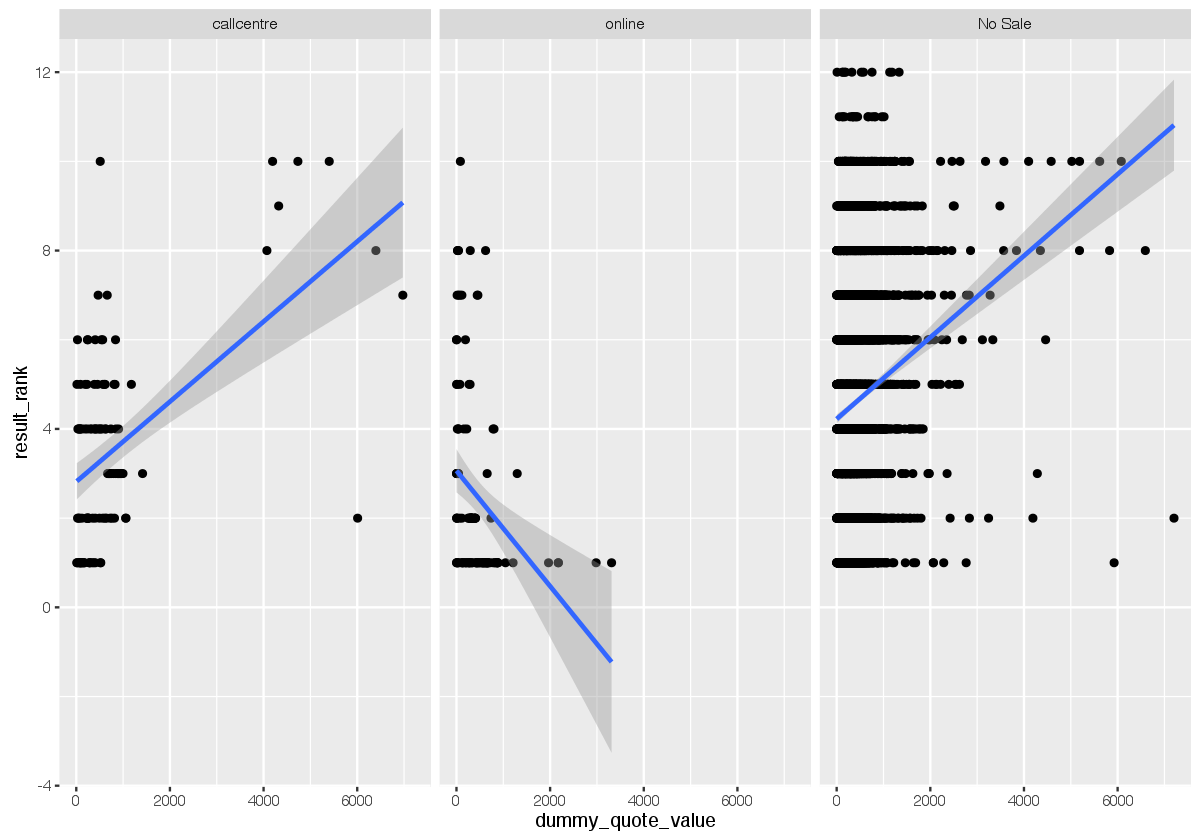

In [65]:
ggplot(dt, aes(x=dummy_quote_value, y=result_rank)) +
    geom_point() +
    stat_smooth(method = "lm") +
    facet_wrap(~Sale_source)

lapply(unique(dt$Sale_source), function(x){
    print(x)
    print(summary(dt[Sale_source == x]$result_rank))
})

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


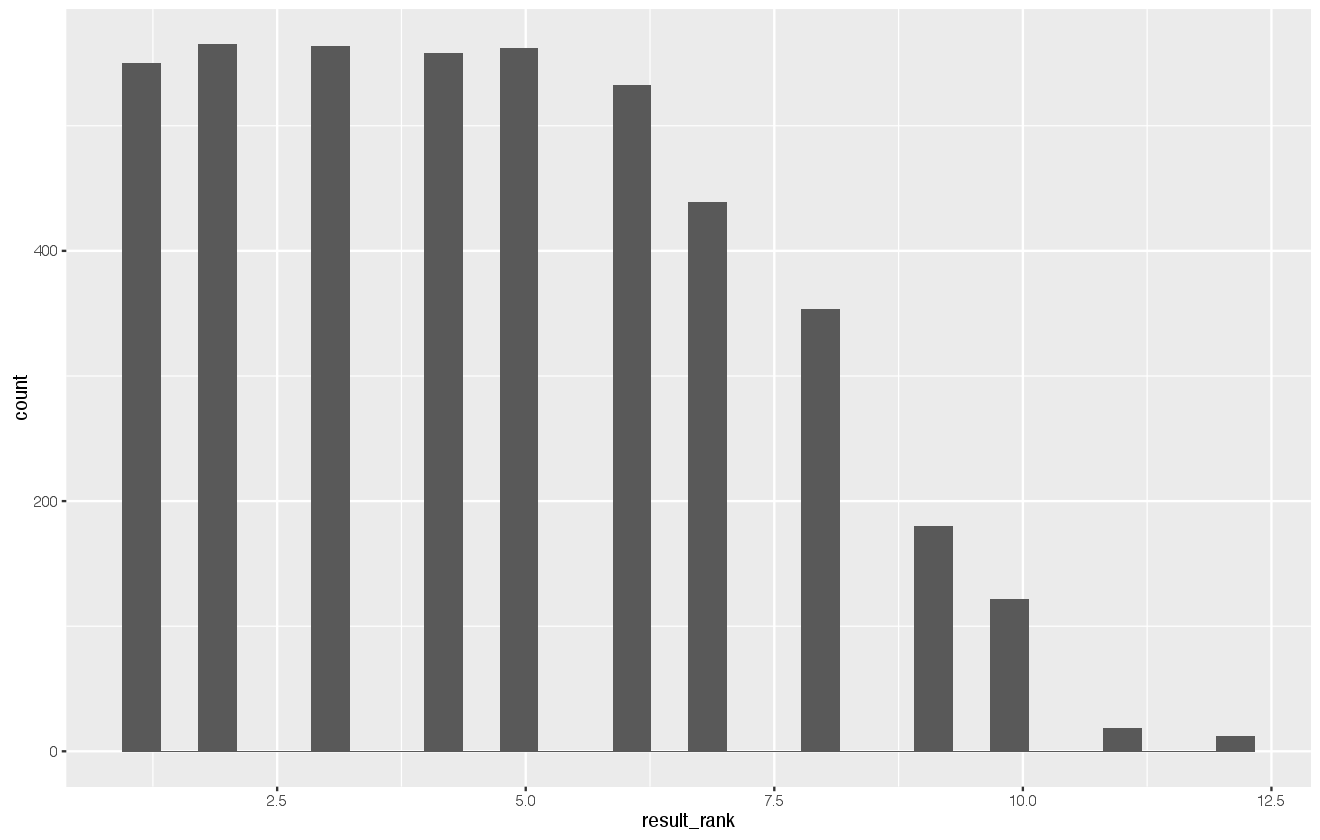

In [13]:
ggplot(dt[Sale_made=='0'], aes(x=result_rank)) + geom_histogram()

In [18]:
cbind(dt[,summary(result_rank), by=c('provider_Nm','Sale_made')], stat=c('min','1st Qu','Median','Mean','3rd Qu','Max'))

ERROR: Error in vapply(df, class, FUN.VALUE = character(1L)): values must be length 1,
 but FUN(X[[3]]) result is length 2


   provider_Nm Sale_made     V1   stat
1   Provider A         0  1.000    min
2   Provider A         0  2.000 1st Qu
3   Provider A         0  4.000 Median
4   Provider A         0  4.143   Mean
5   Provider A         0  6.000 3rd Qu
6   Provider A         0 12.000    Max
7   Provider B         0  1.000    min
8   Provider B         0  5.000 1st Qu
9   Provider B         0  7.000 Median
10  Provider B         0  6.017   Mean
11  Provider B         0  8.000 3rd Qu
12  Provider B         0 12.000    Max
13  Provider A         1  1.000    min
14  Provider A         1  1.000 1st Qu
15  Provider A         1  2.000 Median
16  Provider A         1  3.039   Mean
17  Provider A         1  4.000 3rd Qu
18  Provider A         1 10.000    Max
19  Provider B         1  1.000    min
20  Provider B         1  1.000 1st Qu
21  Provider B         1  1.000 Median
22  Provider B         1  2.815   Mean
23  Provider B         1  4.000 3rd Qu
24  Provider B         1 10.000    Max

In [20]:
print(unique(dt[provider_Nm == "Provider B"]$product_name))
print(unique(dt[provider_Nm == "Provider A"]$product_name))

[1] Product 1412 Product 3164 Product 3532
16 Levels: Product 0 Product 1412 Product 3160 Product 3164 ... Product 88
 [1] Product 64   Product 3160 Product 56   Product 552  Product 3292
 [6] Product 76   Product 84   Product 68   Product 60   Product 88  
[11] Product 80   Product 72   Product 0   
16 Levels: Product 0 Product 1412 Product 3160 Product 3164 ... Product 88
